**Variables en el dataset:**

*   ***HeartDiseaseorAttack:*** es la variable de interés en este modelo, indica si una persona ya ha padecido algún ataque cardíaco o presenta alguna enfermedad cardiovascular.
*   ***HighBP:*** indica si una persona sufre de presión alta en la sangre.
*   ***HighChol:*** indica si una persona sufre de colesterol alto.
*   ***CholCheck:*** indica si una persona se ha hecho control o examen de colesterol en los últimos 5 años.
*   ***BMI:*** índice de masa corporal.
*   ***Smoker:*** indica si una persona ha fumado al menos 100 cigarrillos (5 paquetes) en su vida.
*   ***Stroke:*** indica si una persona ha sufrido un derrame cerebral.
*   ***Diabetes:*** indica si una persona padece diabetes o prediabetes.
*   ***PhysActivity:*** indica si una persona se ha ejercitado o ha realizado alguna actividad física en los últimos 30 días.
*   ***Fruits:*** indica si una persona consume frutas una o más veces por día.
*   ***Veggies:*** indica si una persona consume vegetales una o más veces por día.
*   ***HvyAlcoholConsump:*** indica si una persona es bebedora compulsiva (para los hombres: 14 bebidas por semana y para las mujeres: 7 bebidas por semana).
*   ***AnyHealthCare:*** indica si una persona tiene seguro médico.
*   ***NoDocbcCost:*** indica si en los últimos 12 meses una persona no pudo asistir al doctor por falta de dinero.
*   ***GenHlth:*** indica cómo una persona considera que se encuentra de salud en un nivel del 1 al 5.
*   ***MentHlth:*** considerando factores como estrés, depresión y desorden emocional, nos indica cuántos días de los últimos 30 días una persona considera que su salud mental no ha sido óptima.
*   ***PhysHlth:*** nos indica cuántos días de los últimos 30 días una persona considera que su salud física no ha sido óptima.
*   ***DiffWalk:*** nos indica si una persona tiene dificultades para caminar o subir escaleras.
*   ***Sex:*** género de la persona.
*   ***Age:*** categoría de edad de 14 niveles a la que pertenece la persona.
*   ***Education:*** nos indica la nota máxima que ha tenido una persona o en su defecto, el último año escolar completado.
*   ***Income:*** ingreso anual.

**Importamos algunas librerias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

**Cargamos el dataset:**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')

**Visualizamos los 5 primeros registros en la tabla:**




*   Podemos darnos cuenta de que al parecer todos los datos son de tipo flotante



In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Verificamos el tamaño de los datos y el número de columnas presente en el dataset:**

In [4]:
print(df.shape)

(253680, 22)


Obtenemos que:
*   Hay 22 columnas en el dataset --> 22 variables
*   Hay 253680 datos en el dataset

**Verificamos la cantidad de registros por variable, la media y la desviación estándar:**

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**Verificamos las columnas presentes en el dataset:**

In [6]:
#Nombres de las columnas
df.columns.values

array(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'], dtype=object)

**Verificamos si existen datos nulos o faltantes:**

In [7]:
#Datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Obtenemos que:
*   No existen datos nulos en el dataset
*   Todos los elementos del dataset son de tipo flotante por lo cual no hay que realizar conversiones.



In [8]:
#Datos faltantes
print("The missing values ", df.isnull().sum())

The missing values  HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Obtenemos que:
*   No existen datos faltantes en el dataset



**Verificamos si existen datos duplicados:**

In [9]:
duplicated_rows = df[df.duplicated()]
print(f'Existen {duplicated_rows.shape[0]} datos duplicados en el dataset.')

Existen 23899 datos duplicados en el dataset.


Se evidencia que existen 23899 datos duplicados y se procede a eliminarlos:

In [10]:
df.loc[df.duplicated(), :]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0.0,1.0,1.0,1.0,33.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [11]:
df.drop_duplicates(inplace=True)
print(f'Tamaño de los datos luego de eliminar datos duplicados : {df.shape}')

Tamaño de los datos luego de eliminar datos duplicados : (229781, 22)


**Verificamos la cantidad de datos asociados a nuestra variable de interés *HeartDiseaseorAttack:***
*   Siendo 0 la clase perteneciente a aquellas personas que no sufren de una enfermedad cardiovascular o han padecido un ataque al corazón y 1 la clase perteneciente a las personas que sí han padecido esta condición.

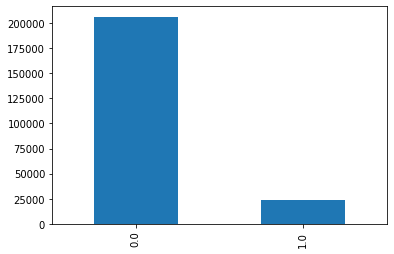

In [12]:
df['HeartDiseaseorAttack'].value_counts().plot(kind='bar')

Se observa que:
*   Existe desbalanceo en los datos puesto que alrededor del 89% de los datos pertenecen a la clase 0 y nos interesa realmente predecir la clase 1.



In [13]:
#Porcentaje de desbalanceo
print("Percentage of patient had a heart disease or attack {} %".format(df['HeartDiseaseorAttack'].value_counts()[1]/len(df) * 100))
print("Percentage of patient did not had a heart disease or attack {} %".format(df['HeartDiseaseorAttack'].value_counts()[0]/len(df) * 100))

Percentage of patient had a heart disease or attack 10.3215670573285 %
Percentage of patient did not had a heart disease or attack 89.6784329426715 %


**Histograma:**

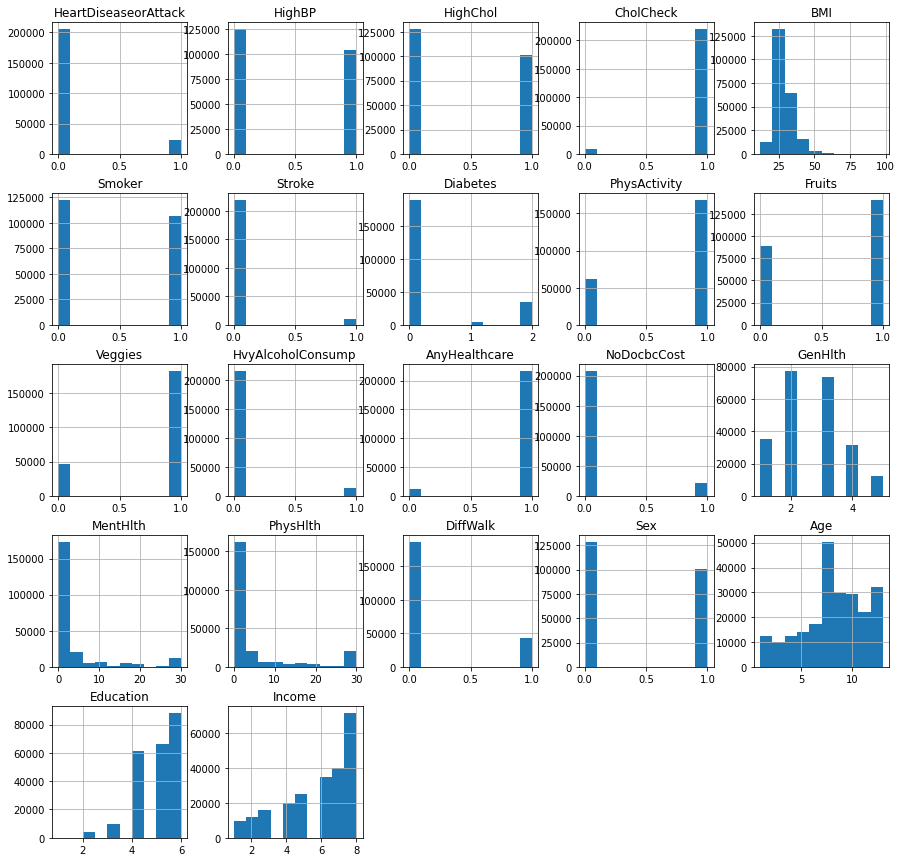

In [14]:
df.hist(figsize=(15,15))
plt.show()

**Correlación:**

Nos interesa conocer la correlación existente entre las variables con nuestra variable de interés para determinar cuáles son realmente importantes para el modelo.

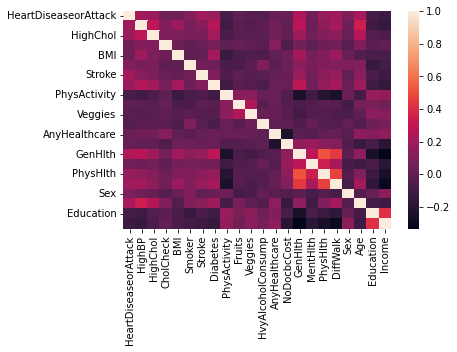

In [15]:
#Matriz de correlación
sns.heatmap(df.corr())

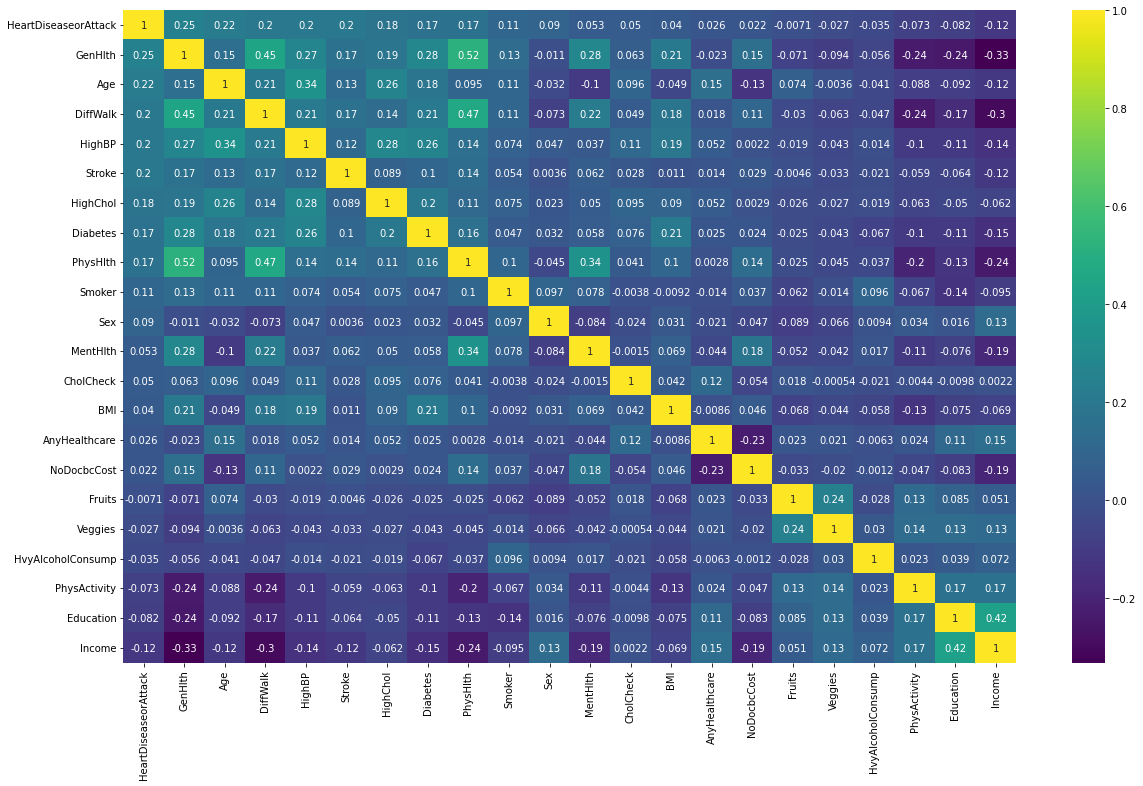

In [16]:
#Matriz de correlación y sus valores
k = 22 #number of variables for heatmap
cols = df.corr().nlargest(k, 'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = df[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [17]:
corr_mat = df.corr()
corr_mat

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,0.170816,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
HighBP,0.201271,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.261976,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.176279,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.203327,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.049995,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.075701,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.039926,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.212027,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.105154,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.046774,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.198863,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.100276,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
Diabetes,0.170816,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,1.000000,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
PhysActivity,-0.073267,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.103408,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.007128,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.025462,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


Obtenemos que:
*   Las variables GenHlth, Age, DiffWalk, Stroke, HighBP, PhysHlth, HighChol y Diabetes son las que tienen una mayor correlación positiva con la variable de interés.
*   Las variables Income, Education, PhysActivity, Veggies, HvyAlcoholConsump y Fruits son las que tienen una mayor correlación negativa con la variable de interés.

**Resolvemos el desbalance aplicando el método UnderSampling:**

In [18]:
X = df.drop('HeartDiseaseorAttack',axis =1)
y = df['HeartDiseaseorAttack']

In [19]:
from imblearn.under_sampling import RandomUnderSampler

print("Before UnderSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = RandomUnderSampler(random_state=42)
X_train, y_train = sm.fit_resample(X, y.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train==0)))

Before UnderSampling, counts of label '1': 23717
Before UnderSampling, counts of label '0': 206064 

After UnderSampling, the shape of train_X: (229781, 21)
After UnderSampling, the shape of train_y: (229781,) 

After UnderSampling, counts of label '1': 23717
After UnderSampling, counts of label '0': 23717


**Train Test Split y escalamiento de los datos:**
* Se dividió el dataset en dos bloques destinados al entrenamiento de los datos y validación del modelo.
*   Se realizó un escalamiento de los datos en busca de garantizar que estos tengan una varianza igual a 1, es decir, se reorganizan los datos en una distribución normal estándar.

In [20]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
TrainandTestwithMinMaxScalar(X,y,QuadraticDiscriminantAnalysis(),'Análisis discriminante Cuadrático')



Model Score: 82.98 %
Precision: 0.2973043027475376
F1 score: 0.3696720651035372
ROC-AUC score: 0.6786003506308863
Confusion Matrix:
 [[35840  5422]
 [ 2401  2294]]



{'Algorithm': 'Análisis discriminante Cuadrático',
 'Model Score': '82.98%',
 'Precision': 0.3,
 'F1 score': 0.37,
 'ROC-AUC score': 0.68}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

TrainandTestwithMinMaxScalar(X,y,GradientBoostingClassifier(),'Gradiente Boosting Tree')


Model Score: 89.95 %
Precision: 0.5850840336134454
F1 score: 0.19438143430465887
ROC-AUC score: 0.5534795394892238
Confusion Matrix:
 [[40783   395]
 [ 4222   557]]



{'Algorithm': 'Gradiente Boosting Tree',
 'Model Score': '89.95%',
 'Precision': 0.59,
 'F1 score': 0.19,
 'ROC-AUC score': 0.55}

In [ ]:
from sklearn.neural_network import MLPClassifier
TrainandTestwithMinMaxScalar(X,y,MLPClassifier(),'Redes Neuronales Artificiales')


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Model Score: 89.78 %
Precision: 0.5248015873015873
F1 score: 0.1838401390095569
ROC-AUC score: 0.5499077055371617
Confusion Matrix:
 [[40731   479]
 [ 4218   529]]



{'Algorithm': 'Redes Neuronales Artificiales',
 'Model Score': '89.78%',
 'Precision': 0.52,
 'F1 score': 0.18,
 'ROC-AUC score': 0.55}

In [ ]:
from sklearn.svm import SVC
TrainandTestwithMinMaxScalar(X,y,SVC(),'Máquinas de Soporte Vectorial')

shape of X_pca (229781, 17)
[0.15763868 0.08432812 0.06489052 0.05774794 0.05577682 0.05379117
 0.04710458 0.04557982 0.0444467  0.04226643 0.03964826 0.03817319
 0.03567269 0.03518068 0.03464135 0.03392342 0.03227366]
suma: 0.9030840423338203


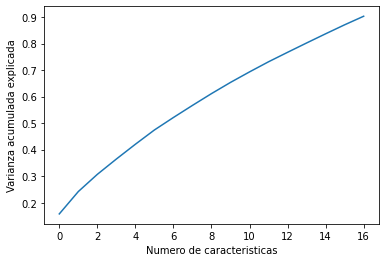

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#normalizamos los datos
scaler=StandardScaler()
df1 = df.drop(['HeartDiseaseorAttack'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df1) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df1)

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=17) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:17]))

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de caracteristicas')
plt.ylabel('Varianza acumulada explicada')
plt.show()

